In [2]:
pip install pandas

     ---------------------------------------- 10.6/10.6 MB 6.5 MB/s eta 0:00:00
  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)
     ---------------------------------------- 14.7/14.7 MB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 6.5 MB/s eta 0:00:00
  Using cached fonttools-4.34.4-py3-none-any.whl (944 kB)
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 55.4/55.4 kB 2.8 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [6]:
pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
     ---------------------------------------- 36.9/36.9 MB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('Movies.csv')

In [10]:
data.shape

(7668, 15)

In [9]:
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [13]:
data['company'].nunique()

2385

In [23]:
df = data.groupby(data['company'])

# Movie Ratings

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'R'),
  Text(1, 0, 'PG'),
  Text(2, 0, 'G'),
  Text(3, 0, 'Not Rated'),
  Text(4, 0, 'NC-17'),
  Text(5, 0, 'Approved'),
  Text(6, 0, 'TV-PG'),
  Text(7, 0, 'PG-13'),
  Text(8, 0, 'Unrated'),
  Text(9, 0, 'X'),
  Text(10, 0, 'TV-MA'),
  Text(11, 0, 'TV-14')])

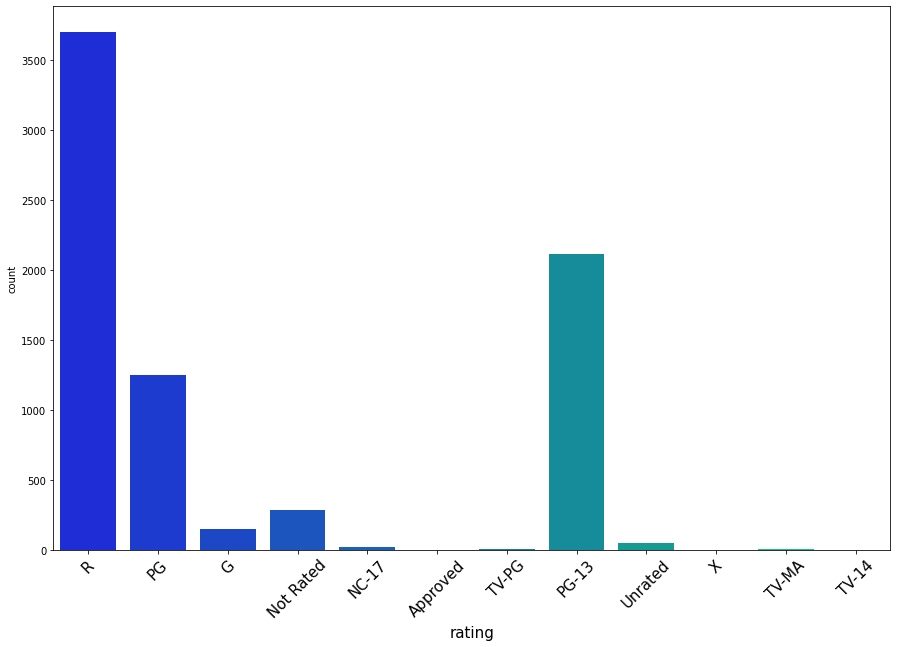

In [21]:
plt.figure(figsize = (15,10))
sns.countplot(data=data,x='rating',palette='winter')
plt.xlabel('rating',size=15)
plt.xticks(rotation=45,size=15)

# Top 10 Production companies

Text(0.5, 0, 'gross')

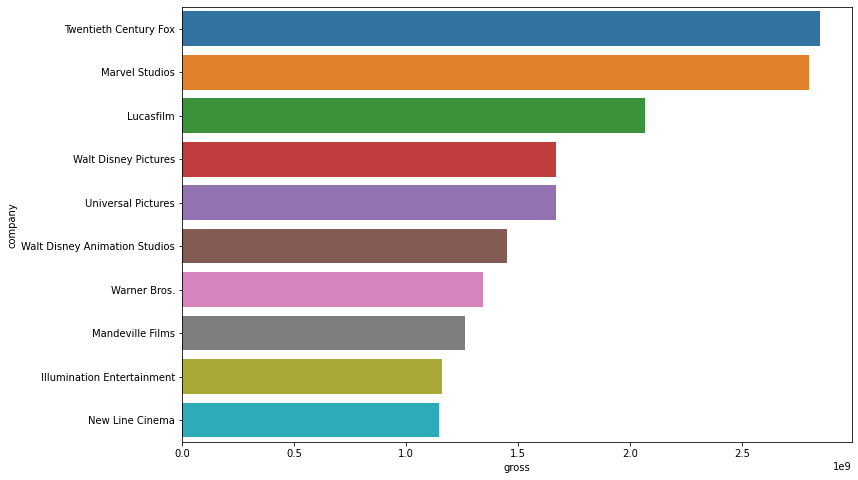

In [30]:
df=data.groupby('company')['gross'].apply(lambda ser: ser.drop_duplicates().nlargest(1)).droplevel(level=1).sort_index().reset_index()
df1=df.nlargest(10, ['gross'])
plt.figure(figsize = (12,8))
sns.barplot(x=df1['gross'],y=df1['company'])
plt.xlabel('gross',size=10)

In [ ]:
plt.figure(figsize=(15,8))
df1['Area'].value_counts()[:10].plot(kind='pie')
plt.show()

In [37]:
movie=data.groupby('name')['runtime'].apply(lambda ser: ser.drop_duplicates().nlargest(1)).droplevel(level=1).sort_index().reset_index()
movie_1=movie.nlargest(10, ['runtime'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'The Best of Youth'),
  Text(1, 0, 'Little Dorrit'),
  Text(2, 0, 'Gettysburg'),
  Text(3, 0, 'Hamlet'),
  Text(4, 0, 'The Beautiful Troublemaker'),
  Text(5, 0, 'Once Upon a Time in America'),
  Text(6, 0, 'Lagaan: Once Upon a Time in India'),
  Text(7, 0, 'Gods and Generals'),
  Text(8, 0, "Heaven's Gate"),
  Text(9, 0, 'Kabhi Khushi Kabhie Gham...')])

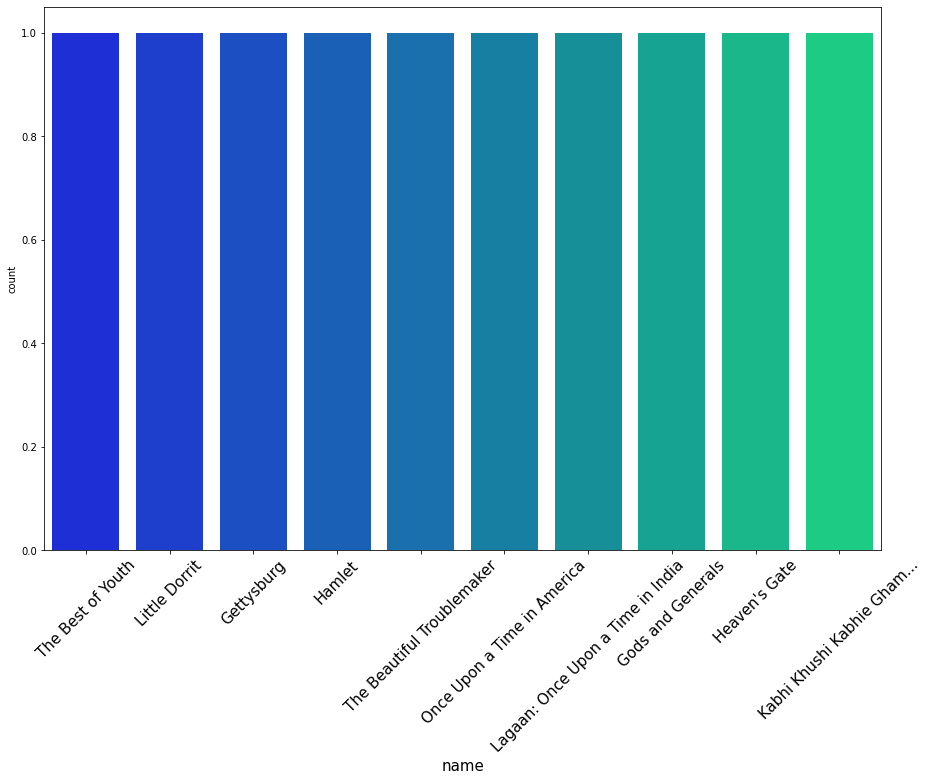

In [38]:
plt.figure(figsize = (15,10))
sns.countplot(data=movie_1,x='name',palette='winter')
plt.xlabel('name',size=15)
plt.xticks(rotation=45,size=15)